In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, binom, norm
import scipy.stats as stats

# Autoreload of the files
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/gaspardvilla/Local/NAT/nat_ada'
# Create the data folder if it doesn't exist
os.makedirs(path, exist_ok=True)
os.makedirs(f"{path}/slides_images", exist_ok=True)
os.makedirs(f"{path}/slides_images/22_05_2025", exist_ok=True)

# Decision Tree - Intuition
***

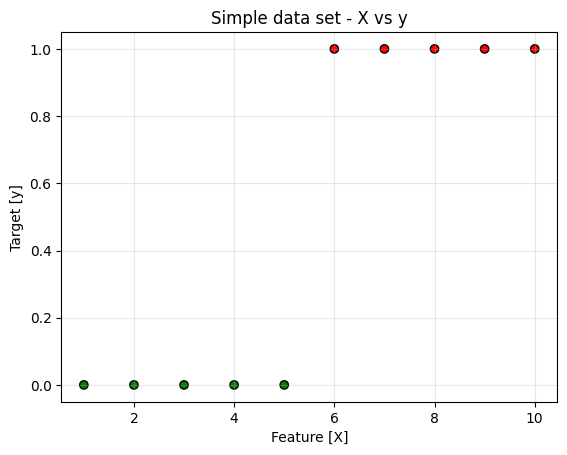

In [4]:
# Build a simple data set - X is 1D and y \in {0,1}
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Plot the data
plt.scatter(X, y, c = ['green' if i == 0 else 'red' for i in y], marker = 'o', edgecolor = 'k')
plt.ylabel('Target [y]')
plt.xlabel('Feature [X]')
plt.grid(alpha=0.3)
plt.title('Simple data set - X vs y')
plt.savefig(f'{path}/slides_images/22_05_2025/simple_data_1.png')
plt.show()

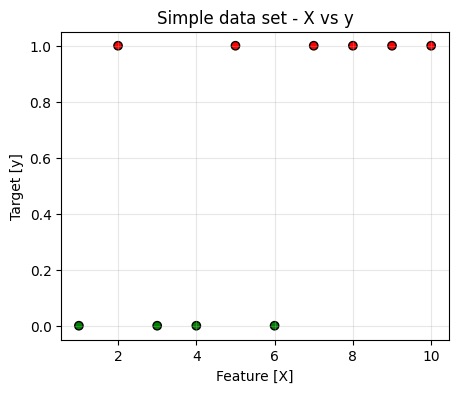

In [5]:
# Build a simple data set - X is 1D and y \in {0,1}
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

# Plot the data
plt.figure(figsize=(5, 4))
plt.scatter(X, y, c = ['green' if i == 0 else 'red' for i in y], marker = 'o', edgecolor = 'k')
plt.ylabel('Target [y]')
plt.xlabel('Feature [X]')
plt.grid(alpha=0.3)
plt.title('Simple data set - X vs y')
plt.savefig(f'{path}/slides_images/22_05_2025/simple_data_2.png')
plt.show()

In [6]:
# Compute mid-values
mids = np.array([(X[i] + X[i+1]) / 2 for i in range(len(X)-1)])

# Init vars arrays
vars_left = np.zeros(len(mids))
vars_right = np.zeros(len(mids))
vars = np.zeros(len(mids))

# Compute variances for each split
for i, mid in enumerate(mids):
    # Compute left and right variances
    vars_left[i] = np.var(y[X <= mid])
    vars_right[i] = np.var(y[X > mid])
    
    # Compute weighted variances
    vars[i] = ((np.sum(X <= mid) * vars_left[i]) + (np.sum(X > mid) * vars_right[i])) / (len(X))
for idx in range(len(mids)):
    print(f'{mids[idx]}: {vars[idx]:.5f}')

1.5: 0.20000
2.5: 0.23750
3.5: 0.20952
4.5: 0.15833
5.5: 0.20000
6.5: 0.13333
7.5: 0.17143
8.5: 0.20000
9.5: 0.22222


In [7]:
idx_min = np.argmin(vars)
print(mids[idx_min])

6.5


# See overfitting issue with regression task
***

/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


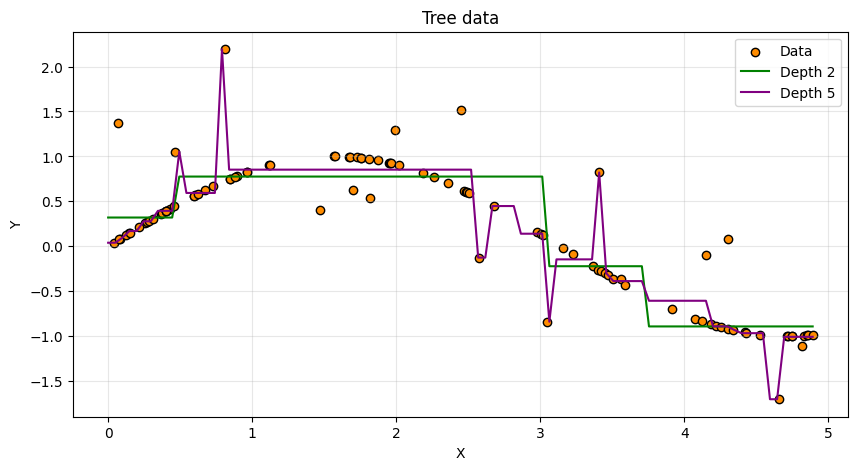

In [36]:
from sklearn.tree import DecisionTreeRegressor

data_tree = pd.read_csv(f'{path}/data/tree_data.csv')

model_2 = DecisionTreeRegressor(max_depth=2)
model_5 = DecisionTreeRegressor(max_depth=5)
# model_10 = DecisionTreeRegressor(max_depth=10)

model_2.fit(data_tree[['x']], data_tree['y'])
model_5.fit(data_tree[['x']], data_tree['y'])
# model_10.fit(data_tree[['x']], data_tree['y'])

xx = np.linspace(0, max(data_tree['x']), 100)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(data_tree['x'], data_tree['y'], c = 'darkorange', marker = 'o', edgecolor = 'k', label='Data')
plt.plot(xx, model_2.predict(xx.reshape(-1, 1)), c = 'green', label='Depth 2')
plt.plot(xx, model_5.predict(xx.reshape(-1, 1)), c = 'purple', label='Depth 5')
plt.title('Tree data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(f'{path}/slides_images/22_05_2025/tree_data.png')
plt.show()


/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/gaspardvilla/miniconda3/envs/nat_ada/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


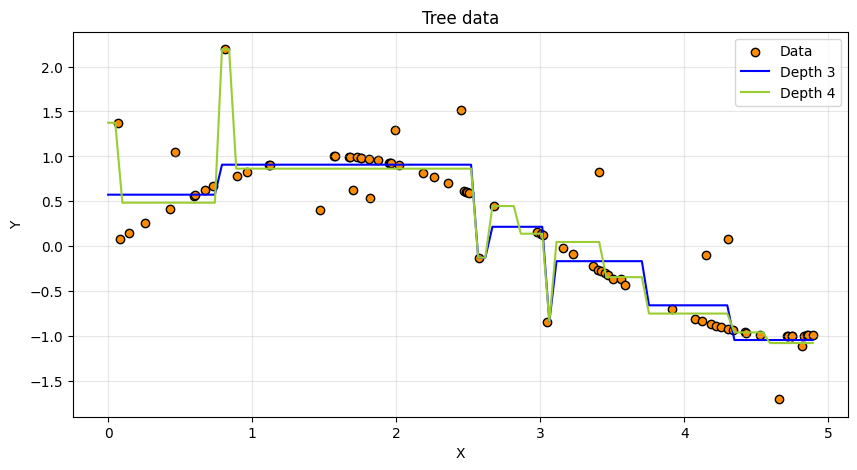

In [9]:
from sklearn.tree import DecisionTreeRegressor

data_tree = pd.read_csv(f'{path}/data/tree_data.csv')

model_3 = DecisionTreeRegressor(max_depth=3)
model_3.fit(data_tree[['x']], data_tree['y'])

model_4 = DecisionTreeRegressor(max_depth=4)
model_4.fit(data_tree[['x']], data_tree['y'])

xx = np.linspace(0, max(data_tree['x']), 100)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(data_tree['x'], data_tree['y'], c = 'darkorange', marker = 'o', edgecolor = 'k', label='Data')
plt.plot(xx, model_3.predict(xx.reshape(-1, 1)), c = 'blue', label='Depth 3')
plt.plot(xx, model_4.predict(xx.reshape(-1, 1)), c = 'yellowgreen', label='Depth 4')
plt.title('Tree data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(f'{path}/slides_images/22_05_2025/tree_data_2.png')
plt.show()


Mean Squared Error: 0.037929440847734266


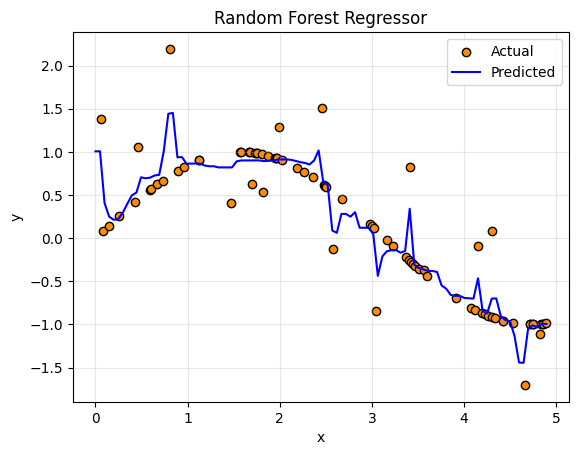

In [23]:
# Train a random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(data_tree[['x']].to_numpy().reshape(-1, 1), data_tree['y'].to_numpy())

xx = np.linspace(0, max(data_tree['x']), 100)

# Make predictions
y_pred = model.predict(data_tree[['x']].to_numpy().reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_tree['y'].to_numpy(), y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(data_tree['x'], data_tree['y'], color='darkorange', marker = 'o', edgecolor = 'k', label='Actual')
plt.plot(xx, model.predict(xx.reshape(-1, 1)), color='blue', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Regressor')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(f'{path}/slides_images/22_05_2025/random_forest_regressor.png')
plt.show()

In [27]:
# Import the libraries
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# nb trees and depth
nb_trees = np.linspace(1, 100, 20, dtype=int)
depth = np.linspace(1, 10, 10, dtype=int)

# Store the data
mse = np.zeros((len(nb_trees), len(depth)))
for idx, n_tree in enumerate(nb_trees):
    for jdx, d in enumerate(depth):

        # Kfold cross validation
        kfold = KFold(n_splits=4, shuffle=True, random_state=42)

        # loop on kfold
        for train_index, test_index in kfold.split(data_tree):
            X_train, X_test = data_tree.iloc[train_index], data_tree.iloc[test_index]
            model = RandomForestRegressor(n_estimators=n_tree, random_state=42, max_depth=d)
            model.fit(X_train[['x']].to_numpy().reshape(-1, 1), X_train['y'].to_numpy())
            y_pred = model.predict(X_test[['x']].to_numpy().reshape(-1, 1))
            mse[idx, jdx] += mean_squared_error(X_test['y'].to_numpy(), y_pred)
        mse[idx, jdx] /= 4
    


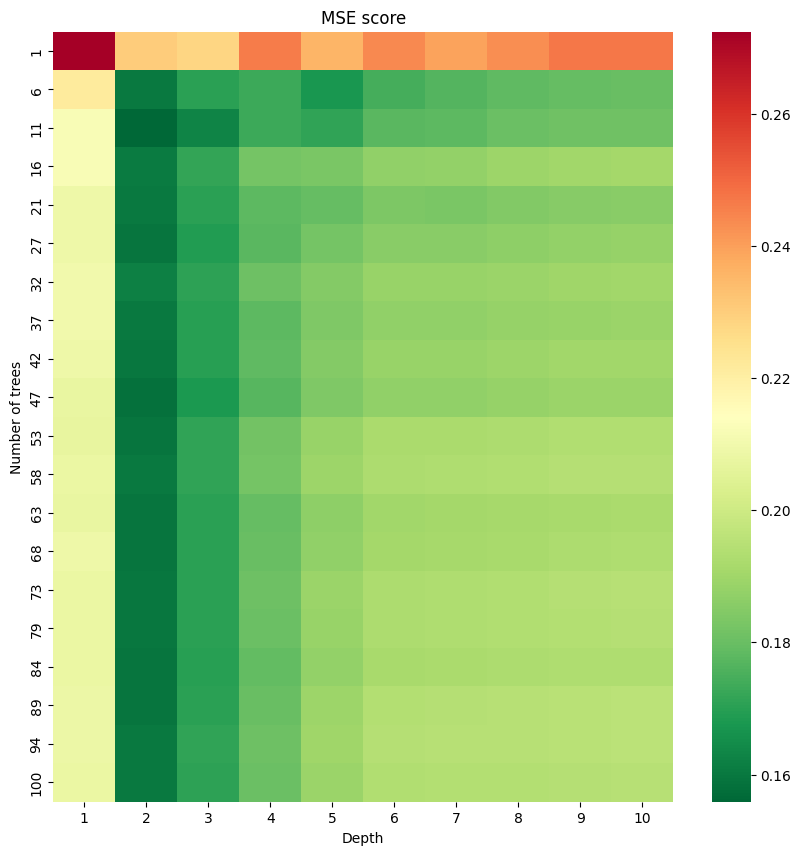

In [32]:
# Plot on heatmap the mse score
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(mse, xticklabels=depth, yticklabels=nb_trees, cmap = 'RdYlGn_r')
plt.xlabel('Depth')
plt.ylabel('Number of trees')
plt.title('MSE score')
plt.savefig(f'{path}/slides_images/22_05_2025/mse_heatmap.png')
plt.show()

Mean Squared Error: 0.11003626965042772


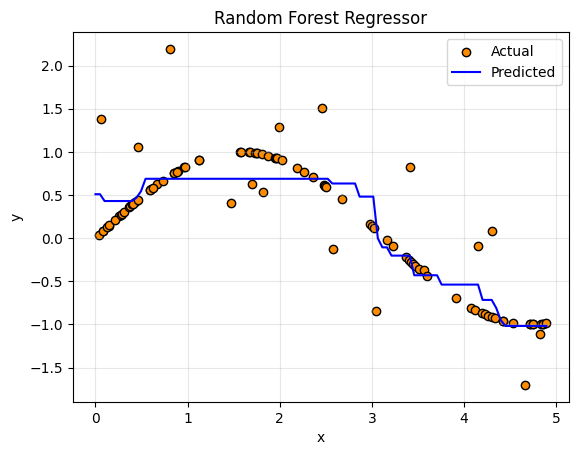

In [37]:
# Train a random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=11, random_state=42, max_depth=2)
model.fit(data_tree[['x']].to_numpy().reshape(-1, 1), data_tree['y'].to_numpy())

xx = np.linspace(0, max(data_tree['x']), 100)

# Make predictions
y_pred = model.predict(data_tree[['x']].to_numpy().reshape(-1, 1))

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(data_tree['y'].to_numpy(), y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.scatter(data_tree['x'], data_tree['y'], color='darkorange', marker = 'o', edgecolor = 'k', label='Actual')
plt.plot(xx, model.predict(xx.reshape(-1, 1)), color='blue', label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Regressor')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig(f'{path}/slides_images/22_05_2025/random_forest_regressor.png')
plt.show()